<a href="https://colab.research.google.com/github/KamronbekSolih/Open-CV/blob/main/img_classification_CNN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN using TensorFlow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
# prompt: how many elements in X_train[0]

X_train[0].size


3072

In [6]:
32*32*3

3072

In [7]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

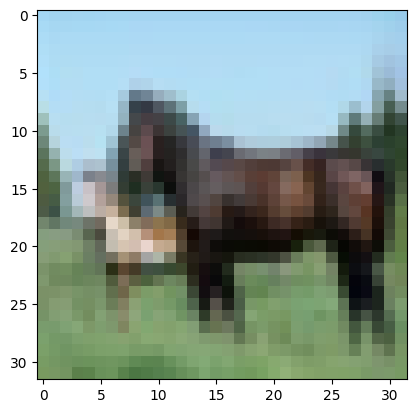

In [8]:
plt.imshow(X_train[12])

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ['airplane','car','bird','cat','deer','dog','frog', 'horse', 'ship', 'truck']

In [11]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


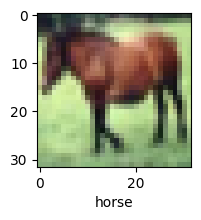

In [12]:
plot_sample(X_train, y_train,7)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[7]

array([[[0.10980392, 0.1372549 , 0.15294118],
        [0.11764706, 0.13333333, 0.17254902],
        [0.12941176, 0.17254902, 0.18431373],
        ...,
        [0.16862745, 0.21960784, 0.17647059],
        [0.20392157, 0.25098039, 0.20784314],
        [0.18039216, 0.22745098, 0.18431373]],

       [[0.10588235, 0.11764706, 0.14901961],
        [0.10588235, 0.10980392, 0.16078431],
        [0.08235294, 0.12156863, 0.15294118],
        ...,
        [0.43921569, 0.53333333, 0.38039216],
        [0.45882353, 0.54901961, 0.39607843],
        [0.45098039, 0.54117647, 0.39215686]],

       [[0.13333333, 0.14117647, 0.16470588],
        [0.12941176, 0.12941176, 0.16862745],
        [0.09411765, 0.11764706, 0.15686275],
        ...,
        [0.68627451, 0.81568627, 0.56078431],
        [0.69411765, 0.81960784, 0.56470588],
        [0.69019608, 0.81568627, 0.56078431]],

       ...,

       [[0.55686275, 0.69019608, 0.4627451 ],
        [0.55686275, 0.69019608, 0.4627451 ],
        [0.58823529, 0

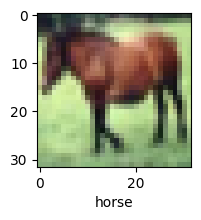

In [15]:
plot_sample(X_train, y_train,7)

ANN

In [16]:
# prompt: the code below says models is not defined. handle this

from tensorflow.keras import datasets, layers, models


In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),

])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8132 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.6256 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5423 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4813 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4351 - accuracy: 0.4946


In [ ]:
print("Classification Report: \n", classification_report(y_test,y_pred))

CNN

In [24]:
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),

])

In [25]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 149s 96ms/step - loss: 1.0847 - accuracy: 0.6267
Epoch 2/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.0645 - accuracy: 0.6293
Epoch 3/10
1563/1563 [==============================] - 148s 94ms/step - loss: 1.0348 - accuracy: 0.6418
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.0088 - accuracy: 0.6486
Epoch 5/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.9821 - accuracy: 0.6595
Epoch 6/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.9584 - accuracy: 0.6673
Epoch 7/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.9334 - accuracy: 0.6780
Epoch 8/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.9094 - accuracy: 0.6850
Epoch 9/10
1563/1563 [==============================] - 154s 98ms/step - loss: 0.8840 - accuracy: 0.6943
Epoch 10/10
1563/1563 [==============================]

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.3180 - accuracy: 0.0977


[2.3179872035980225, 0.09769999980926514]

In [28]:
y_test = y_test.reshape(-1,)


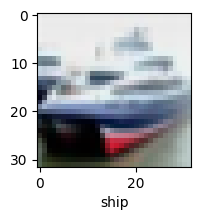

In [29]:
plot_sample(X_test, y_test, 1)

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[0.08813895, 0.09106754, 0.09074359, 0.10872583, 0.11848404,
        0.11517227, 0.0963449 , 0.09904326, 0.08922964, 0.10304997],
       [0.08157732, 0.09175526, 0.10729113, 0.09898689, 0.11440187,
        0.13562146, 0.1030884 , 0.10333008, 0.08097594, 0.08297168],
       [0.08644063, 0.08943155, 0.09565697, 0.10111492, 0.10747185,
        0.12302633, 0.10482203, 0.11251789, 0.08627173, 0.09324609],
       [0.084433  , 0.0986452 , 0.09915157, 0.10528342, 0.11376806,
        0.12282982, 0.09849536, 0.09981043, 0.08678901, 0.09079415],
       [0.08711498, 0.09395062, 0.1000373 , 0.1036718 , 0.11018938,
        0.11311753, 0.09742983, 0.10284437, 0.09136788, 0.10027621]],
      dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[5:10]

[5, 5, 4, 5, 5]

dog
deer
dog
deer
dog
dog


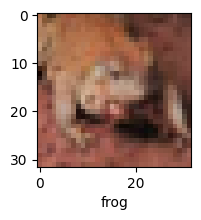

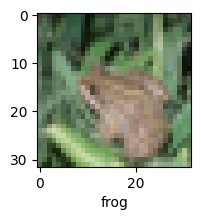

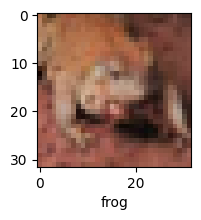

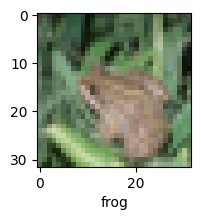

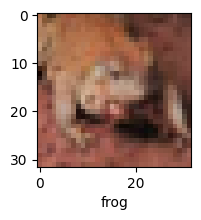

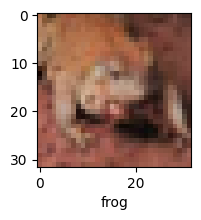

In [42]:
for i in y_classes[34:40]:
  plot_sample(X_test, y_test, i)
  print(classes[i])

In [49]:
classes[y_classes[4]]

'dog'

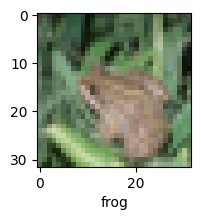

In [50]:
plot_sample(X_test, y_test, 4)

In [53]:
# prompt: import classification report

from sklearn.metrics import classification_report


In [54]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.19      0.03      0.05      1000
           4       0.13      0.31      0.19      1000
           5       0.08      0.63      0.15      1000
           6       0.00      0.00      0.00      1000
           7       0.11      0.02      0.03      1000
           8       0.00      0.00      0.00      1000
           9       0.09      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.06      0.10      0.04     10000
weighted avg       0.06      0.10      0.04     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
